# Simulação Monte Carlo para o cálculo do $\pi$ - atividade avançada

In [ ]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

class CalcPi():
    def __init__(self, pontos = list, retorna_pontos=False):
        self.pontos = pontos
        self.retorna_pontos = retorna_pontos
        self.pontos_internos = []
        self.pontos_externos = []
        self.estimativa_pi = []

    def monte_Carlo_pi(self):
        for i in self.pontos:
            pontos_internos_temp = []   
            pontos_externos_temp = []
            for j in range(i): 
                x= random.uniform(-1,1)  
                y= random.uniform(-1,1)
                if x**2 + y**2 <=1:
                    pontos_internos_temp.append((x,y))
                else:
                    pontos_externos_temp.append((x,y))
            estimativa  = 4 * len(pontos_internos_temp)/ i
            self.estimativa_pi.append(estimativa)


    def  resultado_pi(self):
        self.monte_Carlo_pi()

        if self.retorna_pontos:
            return self.estimativa_pi, self.pontos_internos, self.pontos_externos
        else:
            return self.estimativa_pi
        
    def grafico_pontos_circulo(self):
        r = 1
        theta = np.linspace(0 , 2*np.pi , 1000)
        x1= r* np.cos(theta)
        y1  = r * np.sin(theta)
        plt.figure(figsize=(10, 10))
        plt.plot(x1, y1, color = 'black', label = 'Círculo')
        plt.scatter([x[0] for x in self.pontos_internos], [y[1] for y in self.pontos_internos] , label = 'Pontos internos', s=0.5, alpha=1, color = 'blue')
        plt.scatter([x[0] for x in self.pontos_externos], [y[1] for y in self.pontos_externos] , label = 'Pontos externos', s=0.5, alpha=1, color = 'red')
        plt.title(f'Simulação Monte Carlo para a estimativa de π: {self.estimativa_pi} (pontos = {self.pontos})')
        plt.legend()
        plt.show()   

In [59]:
simulacao1 = CalcPi([100 ,1000, 10000, 100000, 1000000] , False)
resultado1 = simulacao1.resultado_pi()
print(resultado1)

[2.92, 3.148, 3.1472, 3.14128, 3.14186]


[0.03682255532074028, 0.013725054605245696, 0.0037437919485207353, 0.001234704492847088, 0.0003137262238227468]
Log: [-0.51850773 -0.35295839]


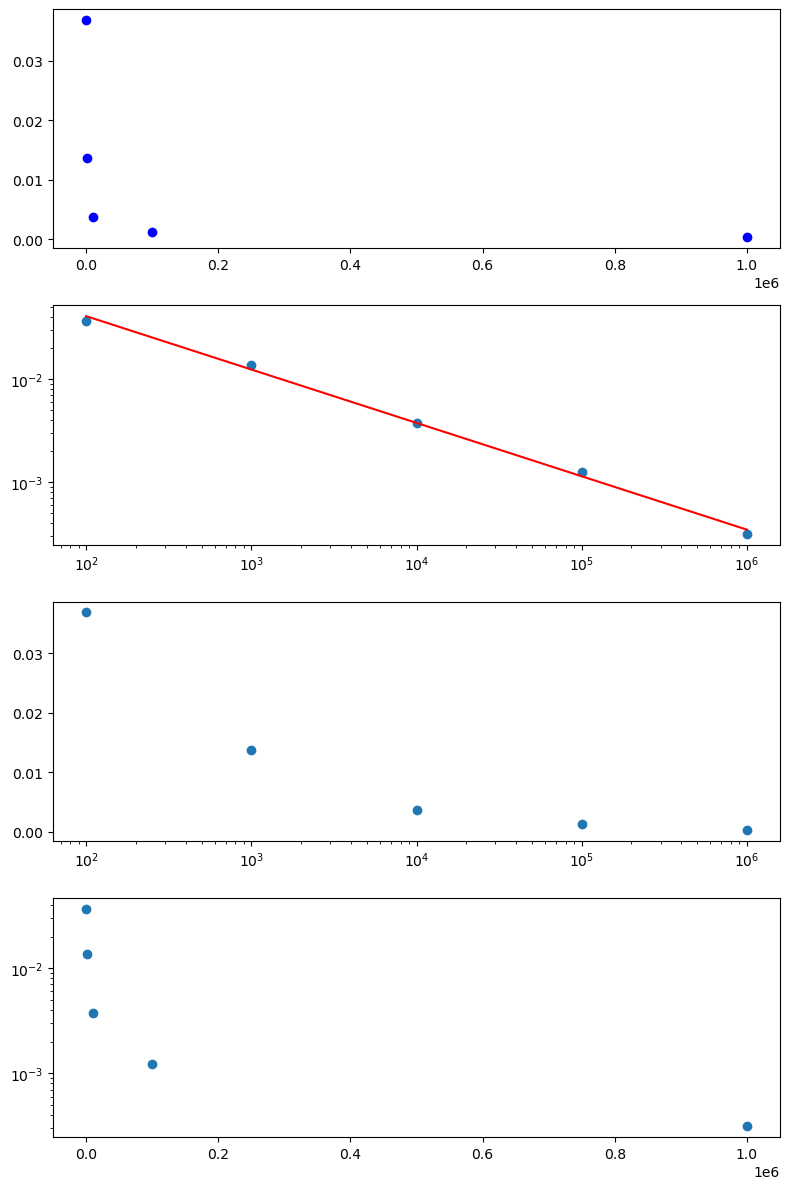

In [63]:
import numpy as np
import matplotlib.pyplot as plt

erro_lista= []
def func(n):
    for i in range(n):
        simulacao1 = CalcPi([100 ,1000, 10000, 100000, 1000000] , False)
        simulacao1.monte_Carlo_pi()
        erro= [abs(pi - np.pi)/np.pi for pi in simulacao1.estimativa_pi]
        erro_lista.append(erro)
    return erro_lista

simulacoes = func(10)

num_simulacoes = len(simulacoes) #numero de simulacoes em 

num_pontos = len(simulacoes[0]) # numero de pontos em cada lista
media_erros = []

for i in range(num_pontos):
    soma = 0 
    for simulacao in simulacoes:
        soma += simulacao[i]  
    media = soma / num_simulacoes  
    media_erros.append(media)

print(media_erros)


plt.figure(figsize=(8,12))
plt.subplot(4,1,1)
plt.plot(simulacao1.pontos, media_erros, 'o', color='blue')



plt.subplot(4,1,2)
plt.loglog(simulacao1.pontos, media_erros, 'o', label='Erro relativo') 
coeficientes2 = np.polyfit(np.log10(simulacao1.pontos), np.log10(media_erros), 1)
print('Log:', coeficientes2)
p2 = np.poly1d(coeficientes2)
log_pontos = np.log10(simulacao1.pontos) 
erro_ajuste = 10**p2(log_pontos)  # Calcula erro ajustado na escala linear
plt.loglog(simulacao1.pontos, erro_ajuste, label='Ajuste log-log', color='red')  

plt.subplot(4,1,3)
coeficientes3 = np.polyfit(np.log10(simulacao1.pontos), media_erros, 1)
plt.semilogx(simulacao1.pontos, media_erros, 'o', label='Erro relativo')



plt.subplot(4,1,4)
coeficientes3 = np.polyfit(simulacao1.pontos, np.log10(media_erros), 1)
plt.semilogy(simulacao1.pontos, media_erros, 'o', label='Erro relativo')


plt.tight_layout()
plt.show()